In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv,det
import cv2
import math

In [3]:
img1 = cv2.imread('1.jpg',0) # image reading with opencv
img2 = cv2.imread('2.jpg',0)
img3 = cv2.imread('3.jpg',0)
img4 = cv2.imread('4.jpg',0)

In [4]:
river=[[154, 20], [158, 31], [100, 488], [161, 165], [165, 46], [170, 467], [174, 54], [175, 67], [179, 110], [172, 114], [172, 133], [159, 144], [177, 453], [167, 185], [160, 185], [167, 188], [162, 193], [168, 200], [173, 210], [172, 219], [184, 229], [181, 213], [191, 245], [185, 252], [184, 247], [197, 251], [200, 255], [195, 270], [203, 271], [209, 274], [215, 282], [212, 289], [212, 296], [221, 300], [226, 309], [218, 311], [218, 314], [207, 323], [204, 336], [205, 350], [208, 354], [197, 363], [192, 370], [188, 381], [182, 399], [186, 400], [184, 410], [164, 470], [151, 488], [149, 504]]
non_river=[[9, 4], [12, 24], [61, 26], [74, 37], [92, 36], [113, 91], [92, 129], [79, 128], [53, 139], [34, 153], [13, 192], [5, 209], [80, 219], [105, 208], [111, 213], [152, 219], [159, 233], [165, 247], [178, 263], [179, 282], [117, 315], [90, 325], [59, 317], [28, 349], [108, 389], [154, 424], [78, 451], [13, 455], [185, 315], [153, 463], [104, 482], [154, 74], [283, 6], [257, 19], [412, 48], [444, 30], [480, 37], [466, 85], [428, 125], [403, 155], [352, 177], [297, 205], [270, 189], [274, 210], [271, 239], [248, 268], [310, 292], [376, 288], [447, 278], [478, 281], [489, 335], [416, 409], [396, 438], [316, 464], [276, 433], [223, 389], [204, 432], [454, 478], [497, 44], [488, 434], [400, 494], [401, 435], [476, 287], [509, 74], [467, 32], [189, 497], [70, 495], [203, 493], [199, 510], [198, 178], [208, 86], [285, 5], [412, 16], [434, 63], [495, 321], [328, 369], [125, 421], [493, 374], [502, 135], [113, 126]]

In [6]:
train_river=[]
train_nonriver=[]
for i in range (len(river)):
    train_river.append([img1[river[i][1]][river[i][0]],img2[river[i][1]][river[i][0]],img3[river[i][1]][river[i][0]],img4[river[i][1]][river[i][0]]])
train_river=np.array(train_river)

for i in range (len(non_river)):
    train_nonriver.append([img1[non_river[i][1]][non_river[i][0]],img2[non_river[i][1]][non_river[i][0]],img3[non_river[i][1]][non_river[i][0]],img4[non_river[i][1]][non_river[i][0]]])
train_nonriver=np.array(train_nonriver)
#STEP 1 && STEP 2 (mean of river class and non river class)
T1=list(np.mean(train_river,axis=0))
T2=list(np.mean(train_nonriver,axis=0))

In [5]:
#STEP 3 and STEP 4 (covariance of river class and non river class)
cov_training_set_riv = np.cov(train_river.T)
cov_training_set_nonriv = np.cov(train_nonriver.T)

In [6]:
#STEP 5 (initializing test_data)
output1 = np.zeros(shape=(512,512), dtype = 'int')
output2 = np.zeros(shape=(512,512), dtype = 'int')
output3 = np.zeros(shape=(512,512), dtype = 'int')
test_data = np.zeros(shape=(512,512,4),dtype='int')
for i in range(512):
    for j in range(512):
        test_data[i][j] = [img1[i][j], img2[i][j], img3[i][j], img4[i][j]]
#STEP 6(Checking dimension of test_data)
print(test_data.shape)

(512, 512, 4)


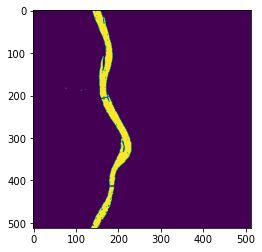

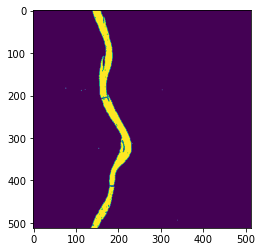

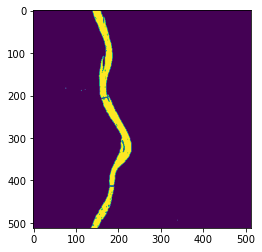

In [7]:
#STEP 7
M1,N1 = 0.3,0.7
M2,N2 = 0.7,0.3
M3,N3 = 0.5,0.5
for i in range(512):
    for j in range(512):
        a = test_data[i][j]-T1
        b = test_data[i][j]-T2
        riv_class = np.dot(np.dot(a.T,inv(cov_training_set_riv)),a) #STEP 8
        non_riv_class = np.dot(np.dot(b.T,inv(cov_training_set_nonriv)),b) #STEP 9
        p1 = 1/(math.sqrt(det(cov_training_set_riv)))*np.exp(riv_class*(-0.5)) #STEP 10
        p2 = 1/(math.sqrt(det(cov_training_set_nonriv)))*np.exp(non_riv_class*(-0.5)) #STEP 11
        #STEP 12
        if(p1*M1 >= p2*N1):    
            output1[i][j] = 255
        else:
            output1[i][j] = 0
        if(p1*M2 >= p2*N2):
            output2[i][j] = 255
        else:
            output2[i][j] = 0
        if(p1*M3 >= p2*N3):
            output3[i][j] = 255
        else:
            output3[i][j] = 0
#STEP 14(Dsiplaying output)
plt.imshow(output1)
plt.show()
plt.imshow(output2)
plt.show()
plt.imshow(output3)
plt.show()

In [12]:
cv2.imwrite("Output/output1.jpg",output1)
cv2.imwrite("Output/output2.jpg",output2)
cv2.imwrite("Output/output3.jpg",output3) #output files saved

True